In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head()

,Fruit Size,Fruit Color,Leaf Size,label
0,60,16,20,0
1,36,34,15,0
2,94,33,15,0
3,36,67,72,1
4,99,61,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Fruit Size   200 non-null    int64
 1   Fruit Color  200 non-null    int64
 2   Leaf Size    200 non-null    int64
 3   label        200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
X = data.drop(['label'], axis = 1)
Y = data['label']

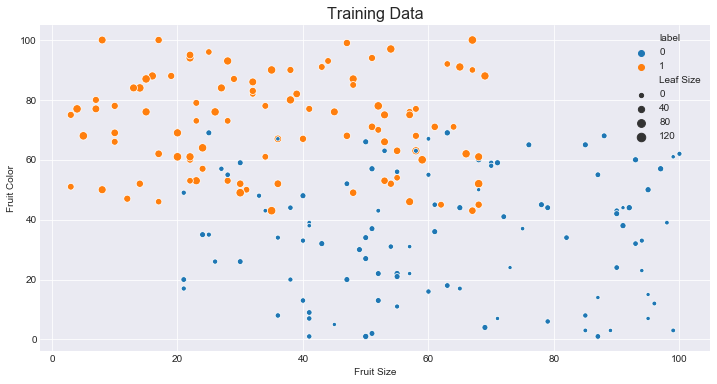

In [6]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Training Data',{'fontsize':16})
sns.scatterplot(data= data, x= 'Fruit Size', y= 'Fruit Color', hue= 'label', size='Leaf Size', ax=ax)
plt.show()

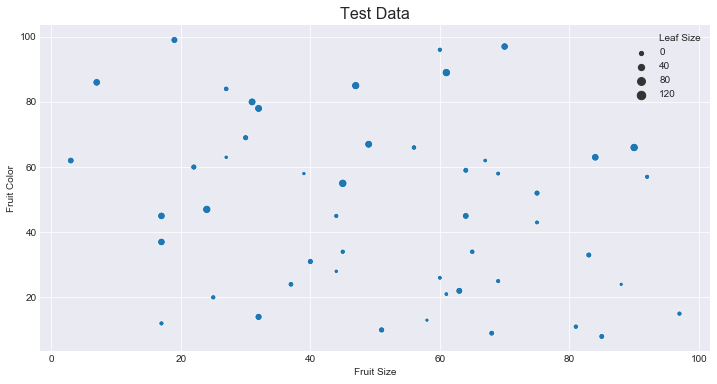

In [7]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Test Data',{'fontsize':16})
sns.scatterplot(data= test, x= 'Fruit Size', y= 'Fruit Color', size='Leaf Size')
plt.show()

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
"""
  This function should return the distance between two data rows
  
"""
# def eucledian_distance(X1,X2):
#     Distance=0.0
#     Distance = np.sqrt(sum((X1-X2)**2)) 
#     return Distance

def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (float(row1[i]) - float(row2[i]))**2
    return np.sqrt(distance)

In [10]:
""" 
  This fucntion should calculate distances between 1 unknown row and all the known data
"""
def calculate_distances(data, test_row, K):
    distances = []
    for train_row in data:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(K):
        neighbors.append(distances[i][0])
    return neighbors

In [11]:
"""
  This function should take the closest K points and return the label of the unknown point
"""
def make_prediction(data, test_row, K):
    neighbors = []
    output_values = []
    neighbors = calculate_distances(data, test_row, K)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [12]:
"""
  This function should be the starting point of the algorithm
  all other function calls should be done inside it
  and it returns predictions of all the unknown points
"""
def run_KNN(data, test, K):
    predictions = []
    for row in test:
        output = make_prediction(data, row, K)
        predictions.append(output)
    return predictions

In [18]:
Predictions = []
K=2
data = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')
Predictions = run_KNN(data, test, K)

In [19]:
Predictions

['0', '0', '0']